In [1]:
from fastai.basics import *
from fastai.vision import *

In [2]:
from matplotlib import pyplot as plt

In [3]:
from pathlib import Path

In [4]:
from PIL import Image

In [5]:
import numpy as np

In [6]:
plt.rcParams['figure.figsize'] = (10,10)

In [7]:
Path.ls = lambda x: list(x.iterdir())

In [11]:
p = Path().resolve(); p

PosixPath('/home/jupyter/projects/sketch2build')

In [13]:
inp_dir = p/'dataset/input'
out_dir = p/'dataset/output'

In [16]:
inp_dir.exists(), out_dir.exists()

(True, True)

# Utilities

In [17]:
# util
def all_files_in(path): return [item for _,_,sublist in os.walk(path) for item in sublist]

In [18]:
len(all_files_in(src_dir))

0

In [19]:
def new_size(size, img):
    r = size / max(img.size)
    return (int(img.size[0]*r), int(img.size[1]*r))

In [20]:
def pil2np(x): 
    return np.asarray(x, dtype=np.float64)/255.

In [21]:
def np2pil(x): 
    return Image.fromarray(np.clip(x*255., 0., 255.).astype(np.uint8))

In [22]:
def show_change(img, f, args=None):
    i = img.resize(new_size(512,img))
    fig, axes = plt.subplots(1,2,figsize=(20,10))
    axes.flat[0].imshow(i)
    axes.flat[1].imshow(f(i, *args)) if args is not None else axes.flat[1].imshow(f(i))

In [23]:
#export
import os,mimetypes
def get_imgfs(path):
    "Fetch all image filenames"
    img_types = tuple(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))
    fn_list = []
    for p,d,f in os.walk(path):
        for fn in f:
            if fn.endswith(img_types):
                fn_list += [Path(p+'/'+fn)]
    return fn_list

In [25]:
get_imgfs(out_dir)[:3]

[PosixPath('/home/jupyter/projects/sketch2build/dataset/output/train/ph136-2.jpg'),
 PosixPath('/home/jupyter/projects/sketch2build/dataset/output/train/ph574-1.jpg'),
 PosixPath('/home/jupyter/projects/sketch2build/dataset/output/train/ph195-0.jpg')]

# Sketch + Threshold

In [26]:
from PIL import Image
from PIL import ImageFilter

In [27]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        value = 128 + factor * (c - 128)
        return max(0, min(255, value))
    return img.point(contrast)

In [34]:
def photo2sketch(fn, a):
    img = Image.open(fn)
    i = change_contrast(img, -100)
    i = img.filter(ImageFilter.SMOOTH_MORE).filter(ImageFilter.CONTOUR).filter(ImageFilter.SMOOTH_MORE)
    i = i.convert('L')
    a = np.asarray(i).copy()
    a[(a>230)==True] = 255
    i = Image.fromarray(a)
    i = i.convert('RGB')
    i.save(inp_dir/'train'/fn.name)

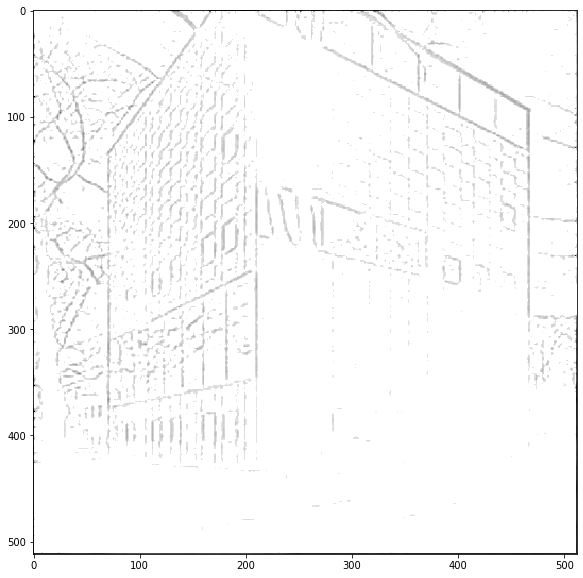

In [33]:
plt.imshow(photo2sketch(get_imgfs(out_dir)[7], 1))

In [35]:
parallel(photo2sketch, get_imgfs(out_dir/'train'))

# Sketch effect

In [19]:
val_fns = list(np.random.choice(get_imgfs(inp_dir), size = 12, replace=False))

In [28]:
t = 240

In [ ]:
fig, axes = plt.subplots( 6, 2, figsize=(20,60))

for fn, ax in zip(val_fns, axes.flat):
    
    i4 = plt.imread(fn).copy()
    #i4[(i4<(t))==True] = 0
    i4[(i4<t)==False] = 255
    ax.imshow(i4)

In [67]:
from PIL import Image
from PIL import ImageFilter

In [68]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        value = 128 + factor * (c - 128)
        return max(0, min(255, value))
    return img.point(contrast)

In [69]:
def photo2sketch(fn, a):
    img = Image.open(fn)
    i = change_contrast(img, -100)
    i = img.filter(ImageFilter.SMOOTH_MORE).filter(ImageFilter.CONTOUR).filter(ImageFilter.SMOOTH_MORE)
    i = i.convert('L')
    i = i.convert('RGB')
    i.save(inp_dir/fn.name)

In [70]:
parallel(photo2sketch, get_imgfs(out_dir))

In [71]:
len(inp_dir.ls())

1870